In [1]:
%cd /content/drive/MyDrive/MCUT/R911R912
!ls

/content/drive/MyDrive/MCUT/R911R912
20220413		code	     test.csv
ARO1_pearsonr_corr.csv	data	     Untitled0.ipynb
ARO1特徵因子分析.ipynb	dataset.pkl  Untitled1.ipynb
ARO2_pearsonr_corr.csv	model
ARO2特徵因子分析.ipynb	PPT


In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler
import joblib

In [3]:
df_x = pd.read_excel('data/ADS47/R911R912 _明志蔡教授_R4-ARO2.xlsx',sheet_name='R911R912_TAG相關錶點資料(X)')
df_x

,Unnamed: 0,ARO2-DCS-FI91304,ARO2-DCS-FI91401,ARO2-DCS-FI914A2,ARO2-DCS-FI914A3,ARO2-DCS-FI914B2,ARO2-DCS-FI914B3,ARO2-DCS-FI91501,ARO2-DCS-FI91502,ARO2-DCS-FI91503,...,ARO2-LIMS-S708@Sulfur,Unnamed: 78,新增補充錶點,ARO2-LIMS-s919@A9,ARO2-LIMS-s919@A10+,ARO2-LIMS-s919@Br.Index,Unnamed: 83,新增補充錶點.1,ARO2-LIMS-S905@Water,ARO2-LIMS-S907@Water
0,2013-01-01 00:00:00,3.285729,541.749573,1109.200439,1497.774536,1112.079346,1484.101318,10.2131,10.271256,10.097632,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-01 01:00:00,3.285753,541.868042,1109.193481,1497.742676,1112.072266,1484.068726,10.215334,10.273468,10.09984,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-01-01 02:00:00,3.285777,541.98645,1109.186646,1497.710693,1112.065186,1484.036133,10.217566,10.275681,10.102048,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-01-01 03:00:00,3.2858,542.104919,1109.179688,1497.678833,1112.058105,1484.003662,10.219799,10.277892,10.104256,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-01-01 04:00:00,3.285824,542.223328,1109.172852,1497.646851,1112.051025,1483.971069,10.222033,10.280104,10.106464,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60674,2021-05-23 20:00:00,3.462423,1199.819702,1192.466187,1503.358398,1191.802246,1516.573975,23.818159,23.266062,23.269722,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60675,2021-05-23 21:00:00,3.459387,1178.187622,1192.965698,1512.720093,1196.045898,1494.919434,21.902145,23.284437,24.544157,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60676,2021-05-23 22:00:00,3.440029,1204.052246,1190.868408,1518.100586,1190.460815,1494.919434,23.369989,23.330378,23.22299,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60677,2021-05-23 23:00:00,3.44483,1810.539307,1847.302979,1559.107544,1851.466797,1540.924072,23.639364,23.41902,22.854397,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
a_col = [
         "ARO2-DCS-R911_2_A_FA",
         "ARO2-DCS-R911_2_HF",
         "ARO2-DCS-R911_2_L2_A",
         "ARO2-DCS-R911_2_L3_A",
         "ARO2-DCS-R911_2_L4_A",
         "ARO2-DCS-R911_2_XF",
        ]


s_col  = [
          "ARO2-DCS-FI914A2",
          "ARO2-DCS-FI914A3",
          "ARO2-DCS-FI91601",
          "ARO2-DCS-FI91701",
          "ARO2-DCS-FI93201",
          "ARO2-DCS-FI94701",
          "ARO2-LIMS-S708@Br.Index",
          "ARO2-LIMS-S708@A9",
          "ARO2-LIMS-S708@A10+",
          "ARO2-LIMS-S708@Water",
          "ARO2-LIMS-S708@Sulfur",
          "ARO2-LIMS-S905@Water",
          "ARO2-LIMS-S907@Water",
]

df_x = df_x[s_col+a_col]

In [5]:
for i in tqdm(df_x.columns):
    df_x[i] = pd.to_numeric(df_x[i],errors='coerce')

  0%|          | 0/19 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
100%|██████████| 19/19 [00:00<00:00, 86.76it/s]


In [6]:
df_x = df_x.fillna(method='ffill')
df_x = df_x.fillna(method='bfill')

In [7]:
df_y = pd.read_excel('data/ADS47/R911R912 _明志蔡教授_R4-ARO2.xlsx',sheet_name='目標值(Y)相關錶點資料')
df_y

,Unnamed: 0,ARO2-LIMS-S708@PX,ARO2-LIMS-S907@PX,ARO2-LIMS-S905@PX,ARO2-LIMS-s922@EB,ARO2-LIMS-s922@PX,ARO2-LIMS-s922@MX,ARO2-LIMS-s922@OX,ARO2-DCS-PX@Recovery
0,2013-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
60674,2021-05-23 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60675,2021-05-23 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60676,2021-05-23 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60677,2021-05-23 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
y_col = ['ARO2-LIMS-s922@MX']

In [9]:
for i in tqdm(df_y.columns):
    df_y[i] = pd.to_numeric(df_y[i],errors='coerce')

100%|██████████| 9/9 [00:00<00:00, 681.31it/s]


In [10]:
df_y = pd.DataFrame(df_y.loc[df_y[y_col[0]].notnull(), y_col[0]])
df_y

,ARO2-LIMS-s922@MX
4615,418.042542
4623,443.037201
4631,430.036316
4639,434.980316
4647,420.972321
...,...
60639,1578.000000
60647,1581.000000
60655,1604.000000
60663,1582.000000


In [44]:
df_xy = df_x.join(df_y)
df_xy

,ARO2-DCS-FI914A2,ARO2-DCS-FI914A3,ARO2-DCS-FI91601,ARO2-DCS-FI91701,ARO2-DCS-FI93201,ARO2-DCS-FI94701,ARO2-LIMS-S708@Br.Index,ARO2-LIMS-S708@A9,ARO2-LIMS-S708@A10+,ARO2-LIMS-S708@Water,ARO2-LIMS-S708@Sulfur,ARO2-LIMS-S905@Water,ARO2-LIMS-S907@Water,ARO2-DCS-R911_2_A_FA,ARO2-DCS-R911_2_HF,ARO2-DCS-R911_2_L2_A,ARO2-DCS-R911_2_L3_A,ARO2-DCS-R911_2_L4_A,ARO2-DCS-R911_2_XF,ARO2-LIMS-s922@MX
0,1109.200439,1497.774536,249.573349,500.489868,703.099792,259.578064,7.150487,0.006104,0.0,61.23539,0.039674,76.967682,93.679619,0.563332,137.501541,0.464575,1.517684,-0.482428,117.524590,NaN
1,1109.193481,1497.742676,249.627914,500.495331,703.119812,259.585602,7.150487,0.006104,0.0,61.23539,0.039674,76.967682,93.679619,0.563318,137.500992,0.464550,1.517680,-0.482434,117.524048,NaN
2,1109.186646,1497.710693,249.682480,500.500793,703.139893,259.593109,7.150487,0.006104,0.0,61.23539,0.039674,76.967682,93.679619,0.563305,137.500458,0.464525,1.517676,-0.482440,117.523499,NaN
3,1109.179688,1497.678833,249.737045,500.506256,703.159912,259.600647,7.150487,0.006104,0.0,61.23539,0.039674,76.967682,93.679619,0.563291,137.499908,0.464501,1.517673,-0.482446,117.522957,NaN
4,1109.172852,1497.646851,249.791611,500.511719,703.179932,259.608185,7.150487,0.006104,0.0,61.23539,0.039674,76.967682,93.679619,0.563277,137.499359,0.464476,1.517669,-0.482452,117.522415,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60674,1192.466187,1503.358398,545.488342,629.368591,905.000000,359.561462,3.100000,0.009000,0.0,45.00000,0.055000,63.099998,68.800003,0.502000,131.988205,0.372907,1.535203,-0.620062,125.987595,NaN
60675,1192.965698,1512.720093,508.997894,576.146851,905.000000,358.138519,3.100000,0.009000,0.0,45.00000,0.055000,63.099998,68.800003,0.502000,131.988205,0.372907,1.535203,-0.620062,125.987595,NaN
60676,1190.868408,1518.100586,541.041016,636.753174,905.000000,359.651581,3.100000,0.009000,0.0,45.00000,0.055000,63.099998,68.800003,0.502000,131.988205,0.372907,1.535203,-0.620062,125.987595,NaN
60677,1847.302979,1559.107544,547.967651,638.237244,905.000000,365.950928,3.100000,0.009000,0.0,45.00000,0.055000,63.099998,68.800003,0.502000,131.988205,0.372907,1.535203,-0.620062,125.987595,NaN


In [45]:
df_xy = df_xy.loc[(df_xy["ARO2-DCS-FI91601"] > 470),:]
df_xy.loc[df_xy["ARO2-LIMS-s922@MX"] > 1700, "ARO2-LIMS-s922@MX"] = np.nan
df_xy.reset_index(drop = True, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [46]:
select_index = df_xy.loc[df_xy[y_col[0]].notnull(), y_col[0]].index.values.tolist()

In [47]:
cut_point = int(len(select_index) * 0.95)

In [ ]:
def MinMax_transform(data):

  for col in data.columns:
    min_value = data[col].min()
    max_value = data[col].max()

    data[col] = (data[col].values - min_value) / (max_value - min_value)

  return data

In [ ]:
min_value = df_xy[y_col].dropna().min()
max_value = df_xy[y_col].dropna().max()
print(min_value, max_value)

df_xy[a_col] = MinMax_transform(df_xy[a_col])
df_xy[s_col] = MinMax_transform(df_xy[s_col])
df_xy.loc[select_index, y_col] = MinMax_transform(df_xy[y_col].dropna())
df_xy

ARO2-LIMS-s922@MX    151.0
dtype: float64 ARO2-LIMS-s922@MX    1721.0
dtype: float64


In [48]:
for i in range(0,8): # T 4:(3+1) 8:(7+1)
  if i == 0:
    train_index = select_index[:cut_point]
    test_index = select_index[cut_point:]
  else:
    train_index = train_index + (np.array(select_index[:cut_point]) -i).tolist()
    test_index = test_index + (np.array(select_index[cut_point:]) -i).tolist()

train_index = sorted(train_index)
test_index = sorted(test_index)

In [49]:
mm_a = MinMaxScaler()
mm_s = MinMaxScaler()
mm_y = MinMaxScaler()


mm_a.fit(df_xy.loc[train_index,a_col])
mm_s.fit(df_xy.loc[train_index,s_col])
mm_y.fit(df_xy.loc[train_index, y_col])

# train
df_xy.loc[train_index, a_col] = mm_a.transform(df_xy.loc[train_index,a_col])
df_xy.loc[train_index, s_col] = mm_s.transform(df_xy.loc[train_index,s_col])
df_xy.loc[train_index, y_col[0]] = mm_y.transform(df_xy.loc[train_index, y_col])[:,0]

df_xy.loc[test_index, a_col] = mm_a.transform(df_xy.loc[test_index, a_col])
df_xy.loc[test_index, s_col] = mm_s.transform(df_xy.loc[test_index, s_col])
df_xy.loc[test_index, y_col[0]] = mm_y.transform(df_xy.loc[test_index, y_col])[:,0]


df_xy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

,ARO2-DCS-FI914A2,ARO2-DCS-FI914A3,ARO2-DCS-FI91601,ARO2-DCS-FI91701,ARO2-DCS-FI93201,ARO2-DCS-FI94701,ARO2-LIMS-S708@Br.Index,ARO2-LIMS-S708@A9,ARO2-LIMS-S708@A10+,ARO2-LIMS-S708@Water,ARO2-LIMS-S708@Sulfur,ARO2-LIMS-S905@Water,ARO2-LIMS-S907@Water,ARO2-DCS-R911_2_A_FA,ARO2-DCS-R911_2_HF,ARO2-DCS-R911_2_L2_A,ARO2-DCS-R911_2_L3_A,ARO2-DCS-R911_2_L4_A,ARO2-DCS-R911_2_XF,ARO2-LIMS-s922@MX
0,1081.380737,1368.792480,470.007935,522.569214,784.07373,289.981323,7.150487,0.006104,0.0,61.23539,0.039674,76.967682,93.679619,0.507969,135.303833,0.364255,1.502211,-0.506585,115.326920,NaN
1,1081.373779,1368.760498,470.062500,522.574707,784.09375,289.988861,7.150487,0.006104,0.0,61.23539,0.039674,76.967682,93.679619,0.507955,135.303284,0.364230,1.502207,-0.506591,115.326370,NaN
2,1081.366943,1368.728516,470.117065,522.580139,784.11377,289.996399,7.150487,0.006104,0.0,61.23539,0.039674,76.967682,93.679619,0.507941,135.302734,0.364205,1.502203,-0.506597,115.325829,NaN
3,1081.360107,1368.696655,470.171631,522.585632,784.13385,290.003906,7.150487,0.006104,0.0,61.23539,0.039674,76.967682,93.679619,0.507928,135.302200,0.364180,1.502200,-0.506603,115.325287,NaN
4,1081.353149,1368.664673,470.226196,522.591064,784.15387,290.011444,7.150487,0.006104,0.0,61.23539,0.039674,76.967682,93.679619,0.507914,135.301651,0.364155,1.502196,-0.506609,115.324745,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52540,1192.466187,1503.358398,545.488342,629.368591,905.00000,359.561462,3.100000,0.009000,0.0,45.00000,0.055000,63.099998,68.800003,0.502000,131.988205,0.372907,1.535203,-0.620062,125.987595,NaN
52541,1192.965698,1512.720093,508.997894,576.146851,905.00000,358.138519,3.100000,0.009000,0.0,45.00000,0.055000,63.099998,68.800003,0.502000,131.988205,0.372907,1.535203,-0.620062,125.987595,NaN
52542,1190.868408,1518.100586,541.041016,636.753174,905.00000,359.651581,3.100000,0.009000,0.0,45.00000,0.055000,63.099998,68.800003,0.502000,131.988205,0.372907,1.535203,-0.620062,125.987595,NaN
52543,1847.302979,1559.107544,547.967651,638.237244,905.00000,365.950928,3.100000,0.009000,0.0,45.00000,0.055000,63.099998,68.800003,0.502000,131.988205,0.372907,1.535203,-0.620062,125.987595,NaN


In [50]:
train_data = {
    'state':[],
    'action':[],
    'value':[],
    'idx':[],
    }

for i in select_index[:cut_point]:
  train_data["state"].append(df_xy.loc[(i-7):i, s_col])
  train_data["action"].append(df_xy.loc[(i-7):i, a_col])
  train_data["value"].append(df_xy.loc[i, y_col])

# reshape
train_data['state'] = np.array(train_data['state'])
train_data['action'] = np.array(train_data['action'])
train_data['value'] = np.array(train_data['value'])

# store mm_scaler
train_data['mm_state'] = mm_s
train_data['mm_action'] = mm_a
train_data['mm_value'] = mm_y


# store col_name
train_data['state_col'] = s_col
train_data['action_col'] = a_col
train_data['value_col'] = y_col

In [51]:
test_data = {
    'state':[],
    'action':[],
    'value':[],
    'idx':[],
    }

for i in select_index[cut_point:]:
  test_data["state"].append(df_xy.loc[(i-7):i, s_col])
  test_data["action"].append(df_xy.loc[(i-7):i, a_col])
  test_data["value"].append(df_xy.loc[i, y_col])

# reshape
test_data['state'] = np.array(test_data['state'])
test_data['action'] = np.array(test_data['action'])
test_data['value'] = np.array(test_data['value'])

# store col_name
test_data['state_col'] = s_col
test_data['action_col'] = a_col
test_data['value_col'] = y_col

In [52]:
train_data['action'].shape,train_data['state'].shape,train_data['value'].shape

((5352, 8, 6), (5352, 8, 13), (5352, 1))

In [53]:
test_data['action'].shape,test_data['state'].shape,test_data['value'].shape

((282, 8, 6), (282, 8, 13), (282, 1))

In [54]:
#保存
data = [train_data, test_data]
joblib.dump(data,'20220413/PX產品MX含量 操作建議/dataset.pkl')

['20220413/PX產品MX含量 操作建議/dataset.pkl']

In [32]:
len(select_index)

4263

In [ ]:
df_xy.to_csv("test.csv")

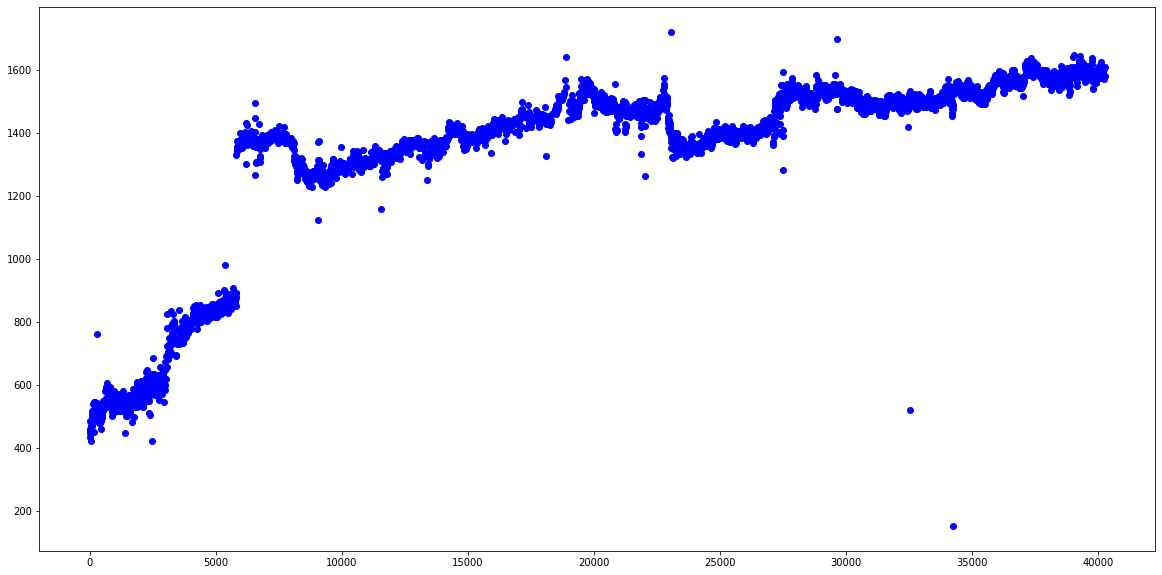

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.scatter(select_index, df_xy[y_col[0]].dropna().values.reshape(-1, 1).reshape(-1,1), c ="blue")
 
# To show the plot
plt.show()